In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.coordinates as coord
from astropy.table import Table
from astropy.io import fits
import astropy.units as u
import gala.coordinates as gc
import h5py

In [2]:
plt.style.use('notebook')

In [3]:
# read profiles
t = Table.read('../data/combined_params_1d.fits')
ind_sort = np.argsort(t['phi1'])
t = t[ind_sort]

In [4]:
# read members
tp = Table.read('../data/members_only.fits')

In [5]:
ceq = coord.SkyCoord(ra=tp['ra']*u.deg, dec=tp['dec']*u.deg, frame='icrs')
cpal = ceq.transform_to(gc.Pal5)

wangle = 180*u.deg

In [6]:
row_labels = ['$\phi_2$ [deg]', '$\phi_2$ [deg]', '$\Delta\phi_2$ [deg]', 'N', '$\sigma$ [deg]']

In [7]:
# polynomial along leading
nlead = 2
ind_lead = t['phi1']>=0
plead = np.polyfit(t['phi1'][ind_lead], t['phi2'][ind_lead], nlead)
polylead = np.poly1d(plead)
xlead = np.linspace(0,10,30)
ylead = polylead(xlead)

# polynomial along trailing
ntrail = 2
ind_trail = t['phi1']<=0
ptrail = np.polyfit(t['phi1'][ind_trail], t['phi2'][ind_trail], ntrail)
polytrail = np.poly1d(ptrail)
xtrail = np.linspace(-17,0,30)
ytrail = polytrail(xtrail)

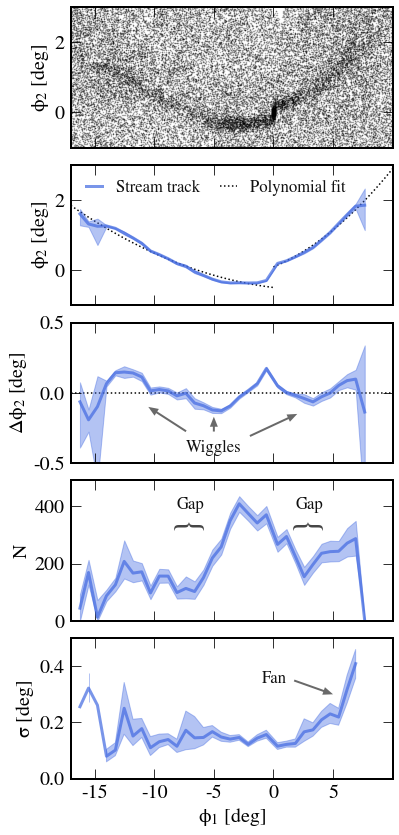

In [24]:
fig, ax = plt.subplots(5,1,figsize=(6,12), sharex='col', sharey='row')

plt.sca(ax[0])
plt.plot(cpal.phi1.wrap_at(wangle), cpal.phi2, 'k.', ms=3, mec='none', alpha=0.3, rasterized=True)
plt.xlim(-17,10)
plt.ylim(-1,3)

plt.sca(ax[1])
plt.plot(t['phi1'], t['phi2'], '-', color='royalblue', lw=3, alpha=0.7, zorder=1, label='Stream track')
plt.fill_between(t['phi1'], t['phi2'] + t['phi2_ep'], t['phi2'] - t['phi2_em'], color='royalblue', alpha=0.4,
                label='')
plt.plot(xlead, ylead, 'k:', label='', zorder=0)
plt.plot(xtrail, ytrail, 'k:', label='Polynomial fit', zorder=0)
plt.ylim(-1,3)
lg = plt.legend(loc=2,ncol=2,frameon=False, fontsize='small', handlelength=1, columnspacing=1.2)
plt.setp(lg.get_texts(), color='#111111')

plt.sca(ax[2])
plt.axhline(0, color='k', ls=':', zorder=0)
polytrack = np.concatenate([polytrail(t['phi1'][t['phi1']<0]), polylead(t['phi1'][t['phi1']>0])])
plt.plot(t['phi1'], t['phi2'] - polytrack,
             '-', color='royalblue', lw=3, alpha=0.7, zorder=20)
plt.fill_between(t['phi1'], t['phi2'] + t['phi2_ep'] - polytrack,
                 t['phi2'] - t['phi2_em'] - polytrack, zorder=1,color='royalblue', alpha=0.4)
plt.ylim(-1.5,0.5)
plt.ylim(-0.5,0.5)

textpos = (-5,-0.42)
plt.annotate('Wiggles', (2.,-0.15), textpos, ha='center', fontsize='small', color='#111111',
             bbox=dict(boxstyle='square, pad=0.5', fc='none', ec='none'),
             arrowprops=dict(color='#444444', width=2, alpha=0.8, headwidth=8, headlength=10, linewidth=0))
# due to a matplotlib3 bug, the annotation arrow can't be perfectly perpendicular :|
plt.annotate('       ', (-4.999,-0.17), textpos, ha='center', fontsize='small',
             bbox=dict(boxstyle='square, pad=0.5', fc='none', ec='none'),
             arrowprops=dict(color='#444444', width=2, alpha=0.8, headwidth=8, headlength=10, linewidth=0))
plt.annotate('       ', (-10.5,-0.1), textpos, ha='center', fontsize='small',
             bbox=dict(boxstyle='square, pad=0.8', fc='none', ec='none'),
             arrowprops=dict(color='#444444', width=2, alpha=0.8, headwidth=8, headlength=10, linewidth=0))

# for x_ in [-13,-4.5,3.5]:
#     plt.axvline(x_)

plt.sca(ax[3])
plt.plot(t['phi1'], t['n'], '-', color='royalblue', lw=3, alpha=0.7)
plt.fill_between(t['phi1'], t['n'] + t['n_ep'], t['n'] - t['n_em'], color='royalblue', alpha=0.4)

plt.text(-7,390, 'Gap', ha='center', fontsize='small', color='#111111')
plt.text(3,390, 'Gap', ha='center', fontsize='small', color='#111111')
plt.annotate(r"$\}$", fontsize=34, rotation=90, xy=(-7,330), color='#444444', ha='center')
plt.annotate(r"$\}$", fontsize=34, rotation=90, xy=(3,330), color='#444444', ha='center')
plt.ylim(0,490)

plt.sca(ax[4])
plt.plot(t['phi1'], t['w'], '-', color='royalblue', lw=3, alpha=0.7)
plt.fill_between(t['phi1'], t['w'] + t['w_ep'], t['w'] - t['w_em'], color='royalblue', alpha=0.4)
plt.xlabel('$\phi_1$ [deg]')
plt.gca().set_xticks([-15,-10,-5,0,5])
plt.ylim(0,0.5)

plt.text(0.1, 0.34, 'Fan', ha='center', fontsize='small', color='#111111',)
plt.annotate('   ', (5,0.3), (0.1,0.38), ha='center', fontsize='small', color='#111111',
             bbox=dict(boxstyle='square, pad=0.8', fc='none', ec='none'),
             arrowprops=dict(color='#444444', width=2, alpha=0.8, headwidth=8, headlength=10, linewidth=0))

# plt.axhline(0.15)

for i in range(5):    
    plt.sca(ax[i])
    plt.ylabel(row_labels[i])

plt.tight_layout(h_pad=0, w_pad=0.4)
plt.savefig('../paper/observed_profiles.pdf', dpi=200)

In [9]:
# total number of stars symmetrically around the cluster
# only approximately same bin width, but this is just order of magnitude calculation anyway
dphi = t['phi1'][23] - t['phi1'][22]
start_lead = np.argmin(np.abs(t['phi1']))

for wrange in [2,3,5,8]:
    nbin = np.int(wrange/dphi)

    nlead = np.sum(t['n'][start_lead:start_lead+nbin])
    ntrail = np.sum(t['n'][start_lead-nbin:start_lead])
    print('{:d} deg: {:.0f} {:.0f} {:.2f}'.format(wrange, nlead, ntrail, ntrail/nlead))

2 deg: 561 711 1.27
3 deg: 785 1085 1.38
5 deg: 1372 2101 1.53
8 deg: 2413 2686 1.11


In [10]:
import pickle

In [11]:
pkl = pickle.load(open('cache/data_lead_01.pkl', 'rb'))

In [204]:
print(t['w'][23], np.median(np.exp(pkl.flatchain[::8,2])))
print(t['phi2'][23], np.median(pkl.flatchain[::8,1])) # different framesw
print(t['f'][23], np.median(np.exp(pkl.flatchain[::8,0])))

0.1218482903744452 0.12149625295988956
0.26753804009110255 0.009975402650767585
0.2669460248914739 0.2678915610707831


In [205]:
t_=t[23]

In [206]:
sigma = np.median(np.exp(pkl.flatchain[:,2]))
mu = np.median(pkl.flatchain[:,1])
b = np.median(pkl.flatchain[:,3])
c = np.median(pkl.flatchain[:,4])

In [224]:
mask_zlim = 23.7
mask_pts = np.load('../data/concave_hull_z{:.1f}.npz'.format(mask_zlim))['pts']
path_concavehull = mpl.path.Path(mask_pts)

In [226]:
from coordinates import (pal5_c, galcen_frame, 
                         pal5_lead_frame, pal5_trail_frame)
m5_c = coord.SkyCoord('15 18 33.22', '+02 04 51.7', 
                      unit=(u.hourangle, u.degree))

In [227]:
data_c = coord.SkyCoord(ra=tp['ra'], dec=tp['dec'], unit=u.deg)
pal5_m5_mask = (data_c.separation(pal5_c) > 0.2*u.deg) & (data_c.separation(m5_c) > 0.3*u.deg)
data_c = data_c[pal5_m5_mask]

In [228]:
_c = data_c.transform_to(gc.Pal5)
_X = np.stack((_c.phi1.degree, _c.phi2.degree)).T
deep_mask = path_concavehull.contains_points(_X)

In [229]:
from density_1d import get_phi2_mask

In [230]:
c_pal5 = {'lead': _c.transform_to(pal5_lead_frame),
              'trail': _c.transform_to(pal5_trail_frame)}

In [ ]:
phi1_mask = (X[:, 0] > l) & (X[:, 0] <= (r + _h_phi1))
phi2_mask, phi2_lim = get_phi2_mask(X[phi1_mask])

In [218]:
phi2_min = -1
phi2_max = 1
norm_bg = 6 / (-6*c*phi2_min - 3*b*phi2_min**2 + 6*c*phi2_max + 3*b*phi2_max**2)

In [221]:
Nbg = norm_bg * t_['n']/t_['f'] * (1 - t_['f']) * 2*sigma*(mu*b + c)

In [214]:
Nstream = t_['n']*0.68

In [223]:
(Nstream - Nbg) / np.sqrt(Nbg)

10.231660306057675

In [233]:
t['phi1'][10:15], t['n'][10:15]

(<Column name='phi1' dtype='float64' length=5>
 -8.834729337395029
 -8.095956429697003
 -7.349806246148416
 -6.613773225478354
 -5.870753501100402, <Column name='n' dtype='float64' length=5>
 156.04162288643423
  98.74747479011774
 113.19798288219901
 102.31131671427296
 150.81666816186004)

In [237]:
gap_indices = np.array([11,12,13])
file_indices = 21 - gap_indices

In [243]:
for i in range(3):
    t_=t[gap_indices[i]]
    pkl = pickle.load(open('cache/data_trail_{:02d}.pkl'.format(file_indices[i]), 'rb'))
    
    sigma = np.median(np.exp(pkl.flatchain[:,2]))
    mu = np.median(pkl.flatchain[:,1])
    b = np.median(pkl.flatchain[:,3])
    c = np.median(pkl.flatchain[:,4])
    
    phi2_min = -2
    phi2_max = 2
    norm_bg = 6 / (-6*c*phi2_min - 3*b*phi2_min**2 + 6*c*phi2_max + 3*b*phi2_max**2)
    
    Nbg = norm_bg * t_['n']/t_['f'] * (1 - t_['f']) * 2*sigma*(mu*b + c)
    Nstream = t_['n']*0.68
    
    snr = (Nstream - Nbg) / np.sqrt(Nbg)
    print(snr, sigma)

3.754422584007007 0.11523615860389685
2.1848147319027484 0.1729362146108267
2.226635423890848 0.14510821953281844


In [ ]:
ln_a, mu_s, lnstd_s, *bg_p = p
b, c = bg_p
a = 0.
lnA = np.log(6) - np.log(-6*c*phi2_min - 3*b*phi2_min**2 - 2*a*phi2_min**3 +
                         6*c*phi2_max + 3*b*phi2_max**2 + 2*a*phi2_max**3)
bg_ll = lnA + np.log(a*phi2**2 + b*phi2 + c)
bg = bg_ll + np.log(a_bg)